In [1]:
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm 
from sklearn.datasets import load_iris

## 1 聊聊Numpy

### 1.1 什么是 NumPy?

### 1.2 手动构造数组

In [2]:
# 从列表中创建一维数组
arr1 = np.array([1, 2, 3, 4])
# 指定数组的数据类型
arr2 = np.array([1, 2, 3, 4], dtype=float)
# 从元组中创建二维数组
arr3 = np.array([(1, 2, 3), (4, 5, 6)])
# 指定最小维度
arr4 = np.array([1, 2, 3, 4], ndmin=2)

arr1, arr2, arr3, arr4

(array([1, 2, 3, 4]),
 array([1., 2., 3., 4.]),
 array([[1, 2, 3],
        [4, 5, 6]]),
 array([[1, 2, 3, 4]]))

In [3]:
# 定义二维数组可视化函数
def visualize_2D(array, title, vmax, vmin):
 
    fig_width = math.ceil(array.shape[1] * 0.5)
    fig_length = math.ceil(array.shape[0] * 0.5)
 
    fig, ax = plt.subplots(figsize=(fig_width, fig_length))
 
    sns.heatmap(array,
                vmax = vmax,
                vmin = vmin,
                annot = True, # 增加注释
                fmt = ".0f", # 注释数值的格式
                square = True, # 热图方格为正方形
                cmap = 'RdYlBu_r', # 指定色谱
                linewidths = .5, # 方格线宽
                cbar = False, # 不显示色谱条
                yticklabels=False, # 不显示纵轴标签
                xticklabels=False, # 不显示横轴标签
                ax = ax) # 指定绘制热图的轴

In [4]:
# 定义一维数组可视化函数
def visualize_1D(array, title):
    fig, ax = plt.subplots()
    colors = cm.RdYlBu_r(np.linspace(0,1,len(array))) # 利用 cm.RdYlBu_r() 将等差数列映射到指定颜色映射上，得到一个包含len(array)个颜色值的数组 colors
    for idx in range(len(array)):
        circle_idx = plt.Circle((idx, 0), 0.5, facecolor=colors[idx], edgecolor = 'w') # 用 plt.Circle() 在指定坐标 (idx, 0)，绘制半径为 0.5 的圆形。
        # 参数 facecolor 用来指定圆形颜色，参数 edgecolor 指定圆形边缘颜色为白色。
        ax.add_patch(circle_idx) # add_patch() 方法在轴对象上添加圆形；注意，这一步不可以省去，不然无法显示圆形对象
        ax.text(idx, 0, s = str(array[idx]), horizontalalignment = 'center', verticalalignment = 'center') # 用 text() 在指定位置显示数组中索引为 idx 的数值
    
    ax.set_xlim(-0.6, 0.6 + len(array))
    ax.set_ylim(-0.6, 0.6)
    ax.set_aspect('equal', adjustable='box')
    ax.axis('off')

[-3 -2 -1  0  1  2  3]
(7,)
7
1
7


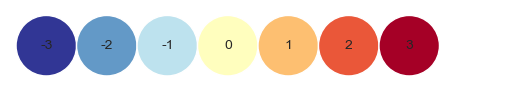

In [5]:
a_1D = np.array([-3, -2, -1, 0, 1, 2, 3])
print(a_1D)
print(a_1D.shape) # 形状
print(len(a_1D)) # 长度 如果 arr 是个二维数组，len(arr) 返回行数
print(a_1D.ndim) # 维数
print(a_1D.size) # 大小 可以使用 size 属性来获取数组所有元素的个数
# 可视化
visualize_1D(a_1D, '手动，一维')

[[-3 -2 -1]
 [ 0  1  2]]
(2, 3)
2
3
2
6
2


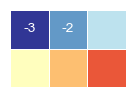

In [6]:
# 定义二维数组
a_2D = np.array([[-3, -2, -1],
                 [0, 1, 2]])
print(a_2D)
# 可视化
visualize_2D(a_2D, '手动，二维', 3, -3)
print(a_2D.shape)
print(a_2D.shape[0]) # 行数
print(a_2D.shape[1]) # 列数
print(a_2D.ndim)
print(a_2D.size)
print(len(a_2D))

(1, 7)
2


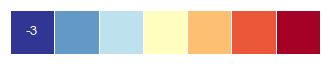

In [7]:
# 定义二维数组，行向量 (两层中括号)
a_row_vector = np.array([[-3, -2, -1, 0, 1, 2, 3]])
# 可视化
visualize_2D(a_row_vector, '手动，行向量', 3, -3)
print(a_row_vector.shape)
print(a_row_vector.ndim)

(7, 1)
2


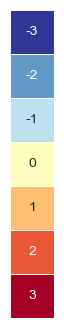

In [8]:
# 定义二维数组，列向量
a_col_vector = np.array([[-3], [-2], [-1], [0], [1], [2], [3]])
# 可视化
visualize_2D(a_col_vector, '手动，列向量', 3, -3)
print(a_col_vector.shape)
print(a_col_vector.ndim)

(2, 3, 4)
3
(3, 4)


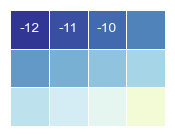

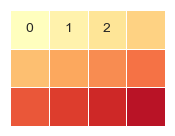

In [9]:
# 定义三维数组
a_3D = np.array([[[-12, -11, -10, -9],
                  [-8, -7, -6, -5],
                  [-4, -3, -2, -1]],
                 [[0, 1, 2, 3],
                  [4, 5, 6, 7],
                  [8, 9, 10, 11]]])
print(a_3D.shape)
print(a_3D.ndim)
# 可视化
visualize_2D(a_3D[0], '手动，三维，第一页', 12, -12)
print(a_3D[0].shape)
visualize_2D(a_3D[1], '手动，三维，第二页', 12, -12)

In [10]:
# 用 numpy.array() 将列表 list 转化为 NumPy 数组
# 一维数组
list_1D = [-3, -2, -1, 0, 1, 2, 3]
array_1D = np.array(list_1D)
print(array_1D.shape)
# 二维数组
list_2D = [[-3, -2, -1, 0, 1, 2, 3]]
array_2D = np.array(list_2D)
print(array_2D.shape)
# 三维数组
list_3D = [[[-3, -2, -1, 0, 1, 2, 3]]]
array_3D = np.array(list_3D)
print(array_3D.shape)

(7,)
(1, 7)
(1, 1, 7)


### 1.3 生成数列

► numpy.arange(start, stop, step) 生成等差数列；从起始值 start 开始，以步长 step递增，直到结束值 stop (不包含 stop)。
  例如，numpy.arange(1, 11, 2) 生成等差数列[1, 3, 5, 7, 9]
► numpy.linspace(start, stop, num, endpoint) 生成等差数列；从起始值 start 开始，到结束值 stop 结束，num 指定数列的长度 (元素的个数)，默认为 50。endpoint 参数指定是否包含结束值。
  例如，numpy.linspace(1, 10, 5) 生成等差数列 [1, 3.25, 5.5, 7.75, 10]
► numpy.logspace(start, stop, num, endpoint, base) 生成等比数列；从 base 的start 次幂开始，到 base 的 stop 次幂结束，num 指定数列的长度，默认为 50。
  例如，numpy.logspace(0, 4, 5, base=2) 将生成一个等比数列 [1, 2, 4, 8, 16]

### 1.4 生成网格数据

(21, 21)


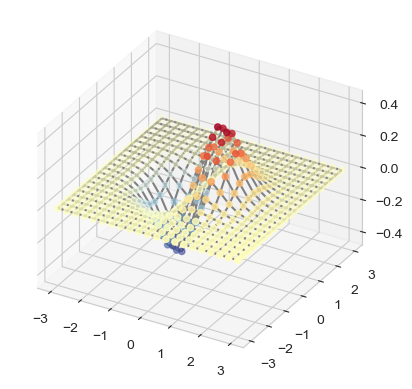

In [11]:
# numpy.meshgrid() 可以生成多维网格数据
x1_array = np.linspace(-3, 3, 21)
x2_array = np.linspace(-3, 3, 21)
xx1, xx2 = np.meshgrid(x1_array, x2_array) # 利用 numpy.meshgrid() 生成网格化数据 (二维数组)，代表 x 和 y 轴坐标。
# 二元函数
ff = xx1 * np.exp(-xx1**2 - xx2**2)
print(xx1.shape)
# 可视化
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(xx1, xx2, ff, rstride=1, cstride=1, color = 'grey')
ax.scatter(xx1, xx2, ff, c = ff, cmap = 'RdYlBu_r')
ax.set_proj_type('ortho')
plt.show()

### 1.5 特殊数组

### 1.6 随机数

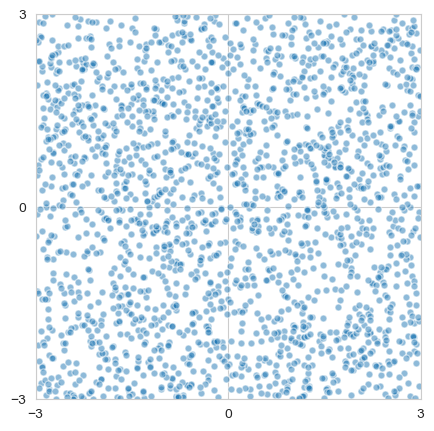

In [12]:
# 生成随机数，服从连续均匀分布
num = 2000
X_uniform = np.random.uniform(low=-3, high=3, size=(num,2))
fig, ax = plt.subplots(figsize = (5,5))
ax.scatter(X_uniform[:,0], # 散点横轴坐标
           X_uniform[:,1], # 散点纵轴坐标
           s = 100, # 散点大小
           marker = '.', # 散点marker样式
           alpha = 0.5, # 透明度
           edgecolors = 'w') # 散点边缘颜色
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_xticks((-3,0,3))
ax.set_yticks((-3,0,3))

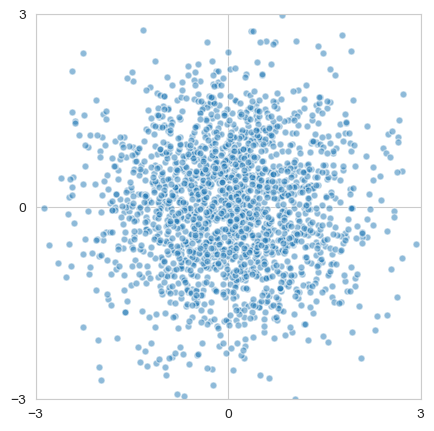

In [13]:
# 生成随机数，服从二元高斯分布
num = 2000
mu = np.array([0, 0]) # 质心
rho = 0 # 相关性系数
Sigma = np.array([[1, rho], [rho, 1]]) # 协方差矩阵
X_binormal = np.random.multivariate_normal(mu, Sigma, size=num)
fig, ax = plt.subplots(figsize = (5,5))
ax.scatter(X_binormal[:,0],
           X_binormal[:,1],
           s = 100,
           marker = '.',
           alpha = 0.5,
           edgecolors = 'w')
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_xticks((-3,0,3))
ax.set_yticks((-3,0,3))

### 1.7 数组导入、导出

<Axes: >

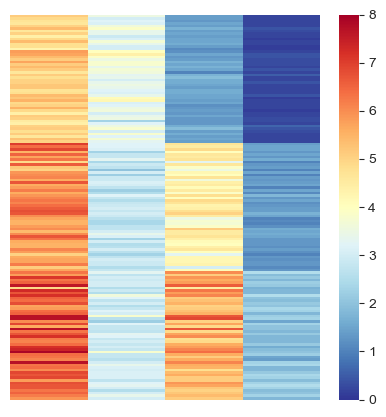

In [14]:
# 导入鸢尾花数据
iris = load_iris()
# iris_sns = sns.load_dataset("iris", data_home='./data/seaborn-data', cache=True)
# 将numpy array存成CSV文件
np.savetxt("./data/Iris_data.csv", iris.data, delimiter=",")
# 将 CSV 文件读入存成numpy array
Iris_Data_array = np.genfromtxt('./data/Iris_data.csv', delimiter=',')
# 可视化
fig, ax = plt.subplots(figsize = (5,5))
sns.heatmap(Iris_Data_array, # 鸢尾花数据数组
            cmap = 'RdYlBu_r', # 指定色谱
            ax = ax, # 指定轴
            vmax = 8, # 色谱最大值
            vmin = 0, # 色谱最小值
            xticklabels = [], # 不显示横轴标签
            yticklabels = [], # 不显示纵轴标签
            cbar = True) # 显示色谱条

## 2 NumPy 索引和切片

◄ numpy.concatenate() 沿指定轴将多个数组连接成一个新的数组
◄ numpy.copy() 深拷贝数组，对新生成的对象修改删除操作不会影响到原对象
◄ numpy.newaxis 在使用它的位置上为数组增加一个新的维度，可以用于在指定位置对数组进行扩展或重塑
◄ numpy.r_() 用于按行连接数组
◄ numpy.reshape() 用于重新调整数组的形状
◄ numpy.squeeze() 从数组的形状中删除大小为 1 的维度，从而返回一个形状更紧凑的数组
◄ numpy.take() 根据指定的索引从数组中获取元素，创建一个新的数组来存储这些元素
◄ numpy.vstack() 将多个数组按行堆叠

### 2.1 什么是索引、切片?

### 2.2 一维数组索引、切片

In [15]:
# numpy.newaxis 是一个特殊的索引，用于增加数组的维度。它的作用是在数组的某个位置添加一个新的轴，从而改变数组的维度。
a = np.array([1, 2, 3, 4, 5])
a1 = a[:, np.newaxis]
a2 = a[np.newaxis, :]
a.shape, a1.shape, a2.shape

((5,), (5, 1), (1, 5))

In [16]:
# numpy.squeeze() 函数用于从数组的形状中删除长度为 1 的维度
b = np.array([[[1, 2, 3],
               [1, 2, 3]]])
b1 = np.squeeze(b)
b.shape, b1.shape

((1, 2, 3), (2, 3))

In [17]:
a[0:3], a[:3], a[[0,1,2]], a[-3:], a[8:]

(array([1, 2, 3]),
 array([1, 2, 3]),
 array([1, 2, 3]),
 array([3, 4, 5]),
 array([], dtype=int32))

In [18]:
a[1::2], a[::2], a[::-2]

(array([2, 4]), array([1, 3, 5]), array([5, 3, 1]))

In [19]:
# 整数索引、切片
a[[0, 1, 2, -1]], a[np.r_[0:3, -1]]
# numpy.r_() 是一个用于将切片对象转换为一个沿着第一个轴堆叠的 NumPy 数组的函数

(array([1, 2, 3, 5]), array([1, 2, 3, 5]))

In [20]:
# 布尔索引、切片
a, a[a>1], a[a<3]
# 直接对元素进行选择

(array([1, 2, 3, 4, 5]), array([2, 3, 4, 5]), array([1, 2]))

### 2.3 视图 vs 副本

当对数组进行切片或使用numpy.copy() 方法时，将生成一个副本。副本的创建可以使用 numpy.copy() 方法或者numpy.array() 函数的参数 copy = True 来实现。

In [21]:
# 创建一个一维数组
a = np.array([1, 2, 3, 4, 5])
# 创建一个切片视图
s = a[1:3]
# 修改视图中的数据
s[0] = 1000
# 查看原始数组
print(a) # 输出：[1 0 3 4 5]
# 创建一个整数数组索引副本
c = a[[1, 3]].copy()
# 修改副本中的数据
c[0] = 888
# 查看原始数组
print(a) # 输出：[1 0 3 4 5]
print(c)

[   1 1000    3    4    5]
[   1 1000    3    4    5]
[888   4]


### 2.4 二维数组索引、切片

In [22]:
# numpy.ix_() 是 NumPy 提供的一个函数，用于将多个一维索引数组转换为一个用于多维数组索引的元组
c = np.array([[-7, -6, -5, -4, -3],
              [-2, -1, 0, 1, 2],
              [3, 4, 5, 6, 7]])
c1 = c[np.ix_([0, 2], [0, 2, 4])]
c, c1, c[c>0]

(array([[-7, -6, -5, -4, -3],
        [-2, -1,  0,  1,  2],
        [ 3,  4,  5,  6,  7]]),
 array([[-7, -5, -3],
        [ 3,  5,  7]]),
 array([1, 2, 3, 4, 5, 6, 7]))

## 3 NumPy 常见运算

◄ numpy.abs() 计算绝对值、复数模
◄ numpy.add() 加法运算
◄ numpy.argmax() 返回数组中最大元素的索引
◄ numpy.argmin() 返回数组中最小元素的索引
◄ numpy.array() 创建 array 数据类型
◄ numpy.average() 计算数组元素的加权平均值
◄ numpy.broadcast_to() 用于将数组广播到指定的形状
◄ numpy.corrcoef() 计算数组中元素的相关性系数矩阵，自由度 ddof 没有影响
◄ numpy.cos() 计算余弦值
◄ numpy.cov() 计算数组中元素的协方差矩阵，默认自由度 ddof 为 0
◄ numpy.divide() 除法运算
◄ numpy.exp() 对数组中的每个元素进行指数运算
◄ numpy.maximum() 逐元素地比较两个数组，并返回元素级别上的较大值组成的新数组
◄ numpy.multiply() 乘法运算
◄ numpy.power() 乘幂运算
◄ numpy.random.multivariate_normal() 用于生成多元正态分布的随机样本
◄ numpy.random.randint() 在指定范围内产生随机整数
◄ numpy.random.uniform() 产生满足连续均匀分布的随机数
◄ numpy.reshape() 用于将数组重新调整为指定的形状
◄ numpy.sin() 计算正弦值
◄ numpy.std() 计算数组中元素的标准差，默认自由度 ddof 为 0
◄ numpy.subtract() 减法运算
◄ numpy.var() 计算数组中元素的方差，默认自由度 ddof 为 0
◄ sklearn.datasets.load_iris() 导入鸢尾花数据

### 3.1  加减乘除乘幂

► 加法：使用 + 运算符或 numpy.add() 函数实现。
► 减法：使用 - 运算符或 numpy.subtract() 函数实现。
► 乘法：使用 * 运算符或 numpy.multiply() 函数实现。
► 除法：使用 / 运算符或 numpy.divide() 函数实现。
► 乘幂：使用 ** 运算符或 numpy.power() 函数实现。

### 3.2 广播原则

In [23]:
# NumPy 的广播原则 (broadcasting) 指定了不同形状的数组之间的算术运算规则，将形状较小的数组扩展为与形状较大的数组相同，再进行运算，以提高效率。
a = np.array([[1, 2, 3, 4, 5],
              [2, 3, 4, 5, 6],
              [3, 4, 5, 6, 7]])
a+1, a*2, a/3, a**4

(array([[2, 3, 4, 5, 6],
        [3, 4, 5, 6, 7],
        [4, 5, 6, 7, 8]]),
 array([[ 2,  4,  6,  8, 10],
        [ 4,  6,  8, 10, 12],
        [ 6,  8, 10, 12, 14]]),
 array([[0.33333333, 0.66666667, 1.        , 1.33333333, 1.66666667],
        [0.66666667, 1.        , 1.33333333, 1.66666667, 2.        ],
        [1.        , 1.33333333, 1.66666667, 2.        , 2.33333333]]),
 array([[   1,   16,   81,  256,  625],
        [  16,   81,  256,  625, 1296],
        [  81,  256,  625, 1296, 2401]], dtype=int32))

### 3.3 统计运算

In [24]:
a1 = a.max()
a2 = a.max(axis=0)
a3 = a.max(axis=1)
a4 = a.max(axis=0, keepdims = True)
a1, a2, a3, a4, a2.shape, a4.shape

(7,
 array([3, 4, 5, 6, 7]),
 array([5, 6, 7]),
 array([[3, 4, 5, 6, 7]]),
 (5,),
 (1, 5))

7.9
[7.9 4.4 6.9 2.5]
[131  15 118 100]
[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
 6.7 6.7 6.3 6.5 6.2 5.9]
[5.84333333 3.05733333 3.758      1.19933333]
[0.68112222 0.18871289 3.09550267 0.57713289]
[0.68569351 0.18997942 3.11627785 0.58100626]
[0.82530129 0.43441097 1.75940407 0.75969263]
[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 

<Axes: >

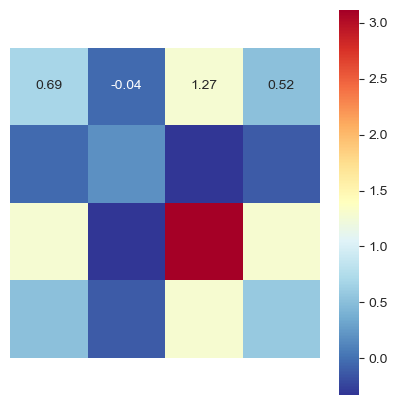

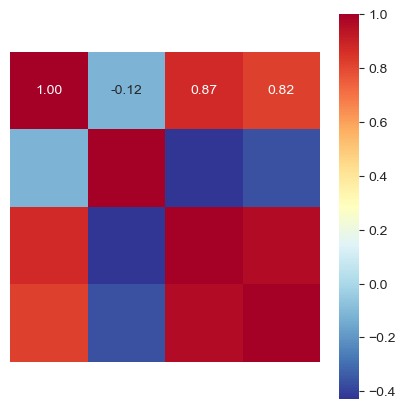

In [25]:
# 供计算协方差矩阵、相关性系数矩阵的
# 导入鸢尾花数据
iris = load_iris()
iris_data_array = iris.data
print(iris_data_array.max()) # 整个矩阵的最大值
print(iris_data_array.max(axis = 0)) # 每列最大值
print(np.argmax(iris_data_array, axis=0)) # 每列最大值位置
print(iris_data_array.max(axis = 1)) # 每行最大值位置
print(np.average(iris_data_array, axis = 0)) # 每列均值
# 计算每一列方差
print(np.var(iris_data_array, axis = 0))
# 注意，NumPy中默认分母为n
print(np.var(iris_data_array, axis = 0, ddof = 1))
# 将分母设为n - 1
# 计算每一列标准差
print(np.std(iris_data_array, axis = 0))
# 计算协方差矩阵；注意转置
SIGMA = np.cov(iris_data_array.T, ddof = 1)
print(SIGMA)
# 可视化协方差矩阵
fig, ax = plt.subplots(figsize = (5,5))
sns.heatmap(SIGMA, cmap = 'RdYlBu_r', annot = True,
            ax = ax, fmt = ".2f", square = True,
            xticklabels = [], yticklabels = [], cbar = True)
# 计算协方差矩阵；注意转置
CORR = np.corrcoef(iris_data_array.T)
print(CORR)
fig, ax = plt.subplots(figsize = (5,5))
sns.heatmap(CORR, cmap = 'RdYlBu_r', annot = True,
            ax = ax, fmt = ".2f", square = True,
            xticklabels = [], yticklabels = [], cbar = True)

### 3.4 常见函数

In [26]:
np.pi, np.e, np.Inf, np.NAN

(3.141592653589793, 2.718281828459045, inf, nan)

np.power(x, p)
np.sin()
np.arcsin()
np.cos()
np.arccos()
np.tan()
np.arctan()
np.sinh()
np.cosh()
np.tanh()
np.abs()
np.floor()
np.ceil()
np.sign()
np.exp()
np.log()

In [27]:
# 自定义可视化函数
def visualize_fx(x_array, f_array, title, step = False):
 
    fig, ax = plt.subplots(figsize = (5,5))
    ax.plot([-5,5],[-5,5], c = 'r', ls = '--', lw = 0.5)
 
    if step:
        ax.step(x_array, f_array, 'r')
    else:
        ax.plot(x_array, f_array)
 
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.axvline(0, c = 'k')
    ax.axhline(0, c = 'k')
    ax.set_xticks(np.arange(-5, 5+1))
    ax.set_yticks(np.arange(-5, 5+1)) 
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    plt.grid(True)
    ax.set_aspect('equal', adjustable='box')
    fig.savefig(title + '.svg', format='svg')

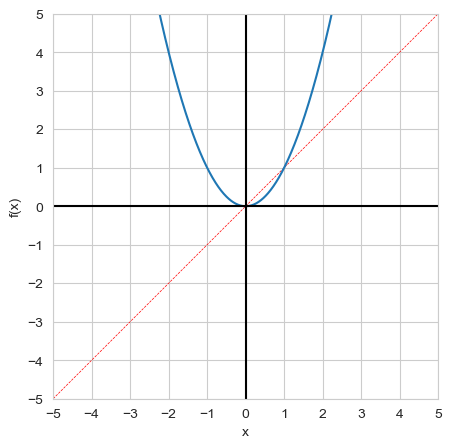

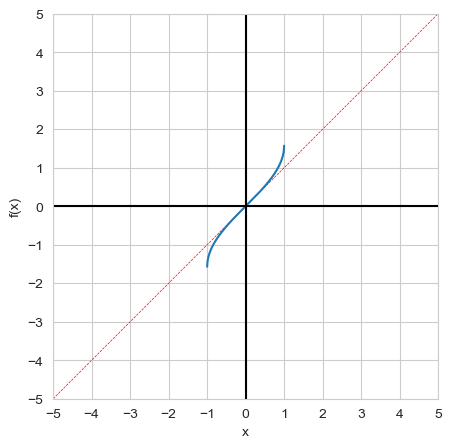

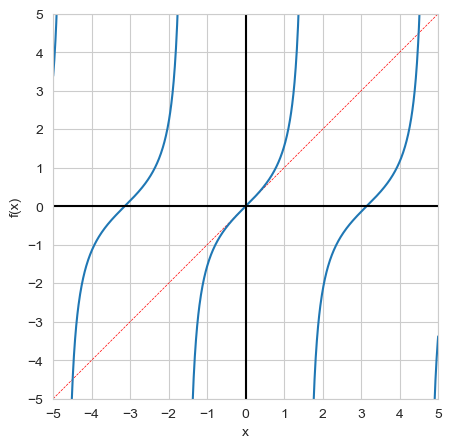

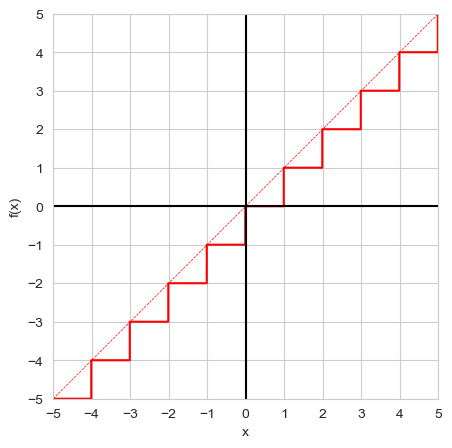

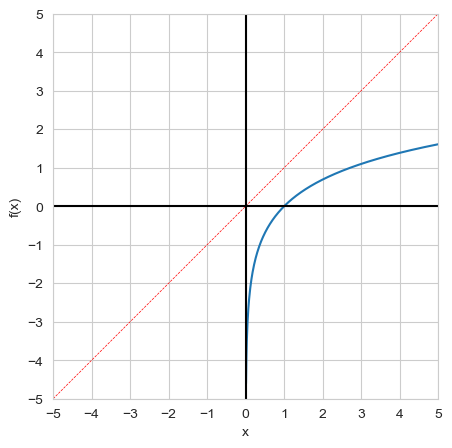

In [28]:
# 幂函数，p = 2
x_array = np.linspace(-5,5,1001)
f_array = np.power(x_array, 2)
visualize_fx(x_array, f_array, '幂函数_p=2')
# 反正弦函数
x_array_ = np.copy(x_array)
x_array_[(x_array_ < -1) | (x_array_ > 1)] = np.nan
f_array = np.arcsin(x_array_)
visualize_fx(x_array_, f_array, '反正弦函数')
# 正切函数
f_array = np.tan(x_array)
f_array[:-1][np.diff(f_array) < 0] = np.nan
visualize_fx(x_array, f_array, '正切函数')
# 向下取整函数
f_array = np.floor(x_array)
visualize_fx(x_array, f_array, '向下取整函数', True)
# 对数函数
x_array_ = np.copy(x_array)
x_array_[x_array_<=0] = np.nan
f_array = np.log(x_array_)
visualize_fx(x_array_, f_array, '对数函数')

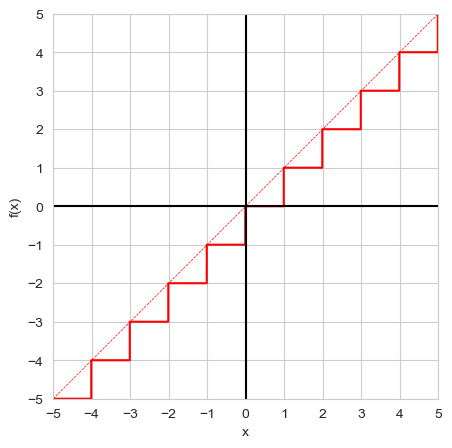

In [29]:
# 向下取整函数
f_array = np.floor(x_array)
visualize_fx(x_array, f_array, '向下取整函数', True)

## 4 NumPy 数组规整

◄ numpy.append() 用于将值添加到数组的末尾，生成一个新的数组，并不会修改原始数组
◄ numpy.arange() 创建一个具有指定范围、间隔和数据类型的等间隔数组
◄ numpy.block() 用于按照指定的块结构组合多个数组，生成一个新的数组
◄ numpy.column_stack() 按列堆叠多个数组，生成一个新的二维数组
◄ numpy.concatenate() 沿指定轴连接多个数组，生成一个新的数组
◄ numpy.delete() 用于删除数组中指定位置的元素，生成一个新的数组，并不会修改原始数组
◄ numpy.flatten() 用于将多维数组转换为一维数组。与 numpy.ravel() 不同的是，numpy.flatten() 返回数组的副本，而不是原始数组的视图
◄ numpy.flip() 用于沿指定轴翻转数组的元素顺序
◄ numpy.fliplr() 沿着水平方向 (左右方向) 翻转数组的元素顺序
◄ numpy.flipud() 沿着垂直方向 (上下方向) 翻转数组的元素顺序
◄ numpy.hsplit() 用于沿水平方向分割数组为多个子数组
◄ numpy.hstack() 按水平方向堆叠多个数组，生成一个新的数组
◄ numpy.insert() 用于在数组的指定位置插入值，生成一个新的数组，并不会修改原始数组
◄ numpy.ravel() 用于将多维数组转换为一维数组，按照 C 风格的顺序展平数组元素
◄ numpy.repeat() 将数组中的元素重复指定次数，生成一个新的数组
◄ numpy.reshape() 用于改变数组的形状，重新排列数组元素，但不改变原始数据本身
◄ numpy.resize() 用于调整数组的形状，并可以在必要时重复数组的元素来填充新的形状
◄ numpy.rot90() 默认将数组按指定次数逆时针旋转 90 度
◄ numpy.row_stack() 按行堆叠多个数组，生成一个新的数组
◄ numpy.shares_memory() 用于检查两个数组是否共享相同的内存位置
◄ numpy.split() 用于将数组沿指定轴进行分割成多个子数组
◄ numpy.squeeze() 用于从数组的形状中去除维度为 1 的维度，使得数组更紧凑
◄ numpy.stack() 用于沿新的轴将多个数组堆叠在一起，生成一个新的数组
◄ numpy.swapaxes() 用于交换数组的两个指定轴的位置
◄ numpy.tile() 用于将数组沿指定方向重复指定次数，生成一个新的数组
◄ numpy.transpose() 完成矩阵转置，即将数组的行和列进行互换
◄ numpy.vsplit() 用于沿垂直方向分割数组为多个子数组
◄ numpy.vstack() 按垂直方向堆叠多个数组，生成一个新的数组

### 4.1 从 reshape() 函数说起

numpy.reshape(a, newshape, order='C')
这个函数的重要输入参数：
● a 参数是要被重塑的数组，可以是一个数组对象，也可以是一个 Python 列表、元组等支持迭代的对象。
● newshape 参数是新的形状，可以是一个整数元组或列表，也可以是一个整数序列。
● order 参数表示重塑数组的元素在内存中存储的顺序，可以是 'C' (按行顺序存储) 或 'F' (按列顺序存储)，默认值为'C'。

In [30]:
# a) 改变数组的维度：可以将一个数组从一维改为二维、三维等。
a = np.arange(12) # 创建一个长度为 12 的一维数组
b = np.reshape(a, (3, 4)) # 改变为 3 行 4 列的二维数组
c = np.reshape(a, (2, 3, 2))
a, b, c

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],
 
        [[ 6,  7],
         [ 8,  9],
         [10, 11]]]))

In [31]:
# b) 展开数组：可以将一个多维数组展开为一维数组。
a = np.array([[1, 2], [3, 4]])
b = np.reshape(a, -1) # 将二维数组展开为一维数组
a, b

(array([[1, 2],
        [3, 4]]),
 array([1, 2, 3, 4]))

In [32]:
# c) 改变数组的顺序：可以改变数组在内存中的存储顺序。
a = np.arange(6).reshape((2, 3)) # 创建一个 2 行 3 列的二维数组
b = np.reshape(a, (3, 2), order='F') 
a, b

(array([[0, 1, 2],
        [3, 4, 5]]),
 array([[0, 4],
        [3, 2],
        [1, 5]]))

### 4.2 一维数组 → 行向量、列向量

In [33]:
a = np.arange(-7, 7+1) 
b = a.reshape(-1, 1)
c = a.reshape(1, -1)
a, b, c

(array([-7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7]),
 array([[-7],
        [-6],
        [-5],
        [-4],
        [-3],
        [-2],
        [-1],
        [ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7]]),
 array([[-7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7]]))

### 4.3 一维数组 → 二维数组

In [34]:
a = np.arange(-7, 8)
np.reshape(a, (3,-1)), np.reshape(a, (3,-1), order = 'F')

(array([[-7, -6, -5, -4, -3],
        [-2, -1,  0,  1,  2],
        [ 3,  4,  5,  6,  7]]),
 array([[-7, -4, -1,  2,  5],
        [-6, -3,  0,  3,  6],
        [-5, -2,  1,  4,  7]]))

np.reshape(a, (3,-1), order = 'F')

### 4.4 一维数组 → 三维数组

In [35]:
a = np.arange(-13, 13 + 1)
a.reshape(3, 3, 3)

array([[[-13, -12, -11],
        [-10,  -9,  -8],
        [ -7,  -6,  -5]],

       [[ -4,  -3,  -2],
        [ -1,   0,   1],
        [  2,   3,   4]],

       [[  5,   6,   7],
        [  8,   9,  10],
        [ 11,  12,  13]]])

### 4.5 视图 vs 副本

### 4.6 转置

numpy.transpose()
array.T

### 4.7 扁平化

array.ravel()
array.reshape(-1)
array.flatten()
ravel()、reshape(-1) 返回的是原始数组的视图， flatten()返回一个数组副本

### 4.8 旋转、翻转

In [36]:
a = np.arange(12).reshape(3, 4)
b = np.rot90(a)
c = np.flip(a, axis=0)
d = np.flip(a, axis=1)
e = np.flip(a)
a, b, c, d, e

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([[ 3,  7, 11],
        [ 2,  6, 10],
        [ 1,  5,  9],
        [ 0,  4,  8]]),
 array([[ 8,  9, 10, 11],
        [ 4,  5,  6,  7],
        [ 0,  1,  2,  3]]),
 array([[ 3,  2,  1,  0],
        [ 7,  6,  5,  4],
        [11, 10,  9,  8]]),
 array([[11, 10,  9,  8],
        [ 7,  6,  5,  4],
        [ 3,  2,  1,  0]]))

### 4.9 堆叠

In [37]:
# 沿行堆叠
a = np.arange(1, 6)
b = np.arange(3, 8)
a, b

(array([1, 2, 3, 4, 5]), array([3, 4, 5, 6, 7]))

In [38]:
np.stack((a, b), 0)

array([[1, 2, 3, 4, 5],
       [3, 4, 5, 6, 7]])

In [39]:
np.row_stack((a, b))

array([[1, 2, 3, 4, 5],
       [3, 4, 5, 6, 7]])

In [40]:
np.vstack((a, b))

array([[1, 2, 3, 4, 5],
       [3, 4, 5, 6, 7]])

In [41]:
# 沿列堆叠
np.stack((a, b),axis=1)

array([[1, 3],
       [2, 4],
       [3, 5],
       [4, 6],
       [5, 7]])

In [42]:
np.column_stack((a, b)) 

array([[1, 3],
       [2, 4],
       [3, 5],
       [4, 6],
       [5, 7]])

In [43]:
np.hstack((a, b))
# 用 numpy.hstack() 堆叠一维数组的结果还是一个一维数组。

array([1, 2, 3, 4, 5, 3, 4, 5, 6, 7])

In [44]:
np.hstack((a.reshape(-1, 1), b.reshape(-1, 1)))

array([[1, 3],
       [2, 4],
       [3, 5],
       [4, 6],
       [5, 7]])

In [45]:
# 拼接
np.concatenate((a.reshape(1, -1), b.reshape(1, -1)), axis = 1)

array([[1, 2, 3, 4, 5, 3, 4, 5, 6, 7]])

In [46]:
np.concatenate((a.reshape(1, -1), b.reshape(1, -1)), axis = 0)

array([[1, 2, 3, 4, 5],
       [3, 4, 5, 6, 7]])

In [47]:
# 堆叠结果为三维数组
A = np.arange(1, 24 + 1).reshape(4, -1)
B = np.arange(-24, 0).reshape(4, -1)
A_B_0 = np.stack((A, B))
A_B_1 = np.stack((A, B), axis=1)
A_B_2 = np.stack((A, B), axis=2)
A_B_0, A_B_1, A_B_2

(array([[[  1,   2,   3,   4,   5,   6],
         [  7,   8,   9,  10,  11,  12],
         [ 13,  14,  15,  16,  17,  18],
         [ 19,  20,  21,  22,  23,  24]],
 
        [[-24, -23, -22, -21, -20, -19],
         [-18, -17, -16, -15, -14, -13],
         [-12, -11, -10,  -9,  -8,  -7],
         [ -6,  -5,  -4,  -3,  -2,  -1]]]),
 array([[[  1,   2,   3,   4,   5,   6],
         [-24, -23, -22, -21, -20, -19]],
 
        [[  7,   8,   9,  10,  11,  12],
         [-18, -17, -16, -15, -14, -13]],
 
        [[ 13,  14,  15,  16,  17,  18],
         [-12, -11, -10,  -9,  -8,  -7]],
 
        [[ 19,  20,  21,  22,  23,  24],
         [ -6,  -5,  -4,  -3,  -2,  -1]]]),
 array([[[  1, -24],
         [  2, -23],
         [  3, -22],
         [  4, -21],
         [  5, -20],
         [  6, -19]],
 
        [[  7, -18],
         [  8, -17],
         [  9, -16],
         [ 10, -15],
         [ 11, -14],
         [ 12, -13]],
 
        [[ 13, -12],
         [ 14, -11],
         [ 15, -10],
     

### 4.10 重复

In [48]:
np.repeat(a, 2), np.repeat(a, 3)

(array([1, 1, 2, 2, 3, 3, 4, 4, 5, 5]),
 array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5]))

In [49]:
np.tile(a, 2), np.tile(a, 3)

(array([1, 2, 3, 4, 5, 1, 2, 3, 4, 5]),
 array([1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5]))

### 4.11 分块矩阵

In [50]:
# 合成
A = np.eye(2)
B = np.arange(-4,4+1).reshape(3,3)
M = np.block([[A,                np.zeros((2, 3))],
              [np.zeros((3, 2)), B               ]])
M

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0., -4., -3., -2.],
       [ 0.,  0., -1.,  0.,  1.],
       [ 0.,  0.,  2.,  3.,  4.]])

In [51]:
# 切割
A_9_by_9 = np.arange(-40,40+1).reshape(9,9)
A_9_by_9, np.split(A_9_by_9, 3), np.split(A_9_by_9, 3, axis = 1)

(array([[-40, -39, -38, -37, -36, -35, -34, -33, -32],
        [-31, -30, -29, -28, -27, -26, -25, -24, -23],
        [-22, -21, -20, -19, -18, -17, -16, -15, -14],
        [-13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5],
        [ -4,  -3,  -2,  -1,   0,   1,   2,   3,   4],
        [  5,   6,   7,   8,   9,  10,  11,  12,  13],
        [ 14,  15,  16,  17,  18,  19,  20,  21,  22],
        [ 23,  24,  25,  26,  27,  28,  29,  30,  31],
        [ 32,  33,  34,  35,  36,  37,  38,  39,  40]]),
 [array([[-40, -39, -38, -37, -36, -35, -34, -33, -32],
         [-31, -30, -29, -28, -27, -26, -25, -24, -23],
         [-22, -21, -20, -19, -18, -17, -16, -15, -14]]),
  array([[-13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5],
         [ -4,  -3,  -2,  -1,   0,   1,   2,   3,   4],
         [  5,   6,   7,   8,   9,  10,  11,  12,  13]]),
  array([[14, 15, 16, 17, 18, 19, 20, 21, 22],
         [23, 24, 25, 26, 27, 28, 29, 30, 31],
         [32, 33, 34, 35, 36, 37, 38, 39, 40]])],
 [array([[-40, -39,

In [52]:
# 沿着水平方向切割
np.hsplit(A_9_by_9, 3)

[array([[-40, -39, -38],
        [-31, -30, -29],
        [-22, -21, -20],
        [-13, -12, -11],
        [ -4,  -3,  -2],
        [  5,   6,   7],
        [ 14,  15,  16],
        [ 23,  24,  25],
        [ 32,  33,  34]]),
 array([[-37, -36, -35],
        [-28, -27, -26],
        [-19, -18, -17],
        [-10,  -9,  -8],
        [ -1,   0,   1],
        [  8,   9,  10],
        [ 17,  18,  19],
        [ 26,  27,  28],
        [ 35,  36,  37]]),
 array([[-34, -33, -32],
        [-25, -24, -23],
        [-16, -15, -14],
        [ -7,  -6,  -5],
        [  2,   3,   4],
        [ 11,  12,  13],
        [ 20,  21,  22],
        [ 29,  30,  31],
        [ 38,  39,  40]])]

In [53]:
# 沿着竖直方向切割
np.vsplit(A_9_by_9, 3)

[array([[-40, -39, -38, -37, -36, -35, -34, -33, -32],
        [-31, -30, -29, -28, -27, -26, -25, -24, -23],
        [-22, -21, -20, -19, -18, -17, -16, -15, -14]]),
 array([[-13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5],
        [ -4,  -3,  -2,  -1,   0,   1,   2,   3,   4],
        [  5,   6,   7,   8,   9,  10,  11,  12,  13]]),
 array([[14, 15, 16, 17, 18, 19, 20, 21, 22],
        [23, 24, 25, 26, 27, 28, 29, 30, 31],
        [32, 33, 34, 35, 36, 37, 38, 39, 40]])]

## 5 NumPy 线性代数

### 5.1 NumPy 的 linalg 模块

► numpy.linalg.inv() 计算矩阵的逆。
► numpy.linalg.pinv() 计算矩阵的 Moore-Penrose 伪逆。
► numpy.linalg.solve() 求解线性方程组 Ax = b，其中 A 是一个矩阵，b 是一个向量。
► numpy.linalg.lstsq() 求解最小二乘。
► numpy.linalg.norm() 计算向量的范数。
► numpy.linalg.dot() 计算向量的点积 (标量积、内积)。
► numpy.linalg.cholesky() 计算 Cholesky 分解。
► numpy.linalg.eig() 计算矩阵的特征值和特征向量。
► numpy.linalg.svd() 计算奇异值分解。

### 5.2 拆解矩阵

In [55]:
# 从sklearn导入鸢尾花数据
iris = load_iris()
X = iris.data
# 提取四个行向量 (二维数组)
x_row_1 = X[[1 - 1], :]
x_row_2 = X[[2 - 1], :]
x_row_51 = X[[51 - 1], :]
x_row_101 = X[[101 - 1], :]
# 提取四个列向量 (二维数组)
x_col_1 = X[:, [0]]
x_col_2 = X[:, [1]]
x_col_3 = X[:, [2]]
x_col_4 = X[:, [3]]

### 5.3  向量运算

In [57]:
# 向量模 (L2范数）
norm_x_row_1 = np.linalg.norm(x_row_1)
norm_x_row_2 = np.linalg.norm(x_row_2)
norm_x_row_51 = np.linalg.norm(x_row_51)
norm_x_row_101 = np.linalg.norm(x_row_101)
# 计算单位向量
unit_x_row_1 = x_row_1 / norm_x_row_1
unit_x_row_2 = x_row_2 / norm_x_row_2
unit_x_row_51 = x_row_51 / norm_x_row_51
unit_x_row_101 = x_row_101 / norm_x_row_101
# 计算向量内积
inner_prod_x_row_1_2 = np.dot(x_row_1[0], x_row_2[0])
inner_prod_x_row_1_51 = np.dot(x_row_1[0], x_row_51[0])
inner_prod_x_row_1_101 = np.dot(x_row_1[0], x_row_101[0])
# 计算单位向量内积
dot_product_1_51 = np.dot(unit_x_row_1[0], unit_x_row_51[0])
# 将结果转化为弧度
angle_1_51 = np.arccos(dot_product_1_51)
# 将结果转化为角度
angle_1_51 = np.rad2deg(angle_1_51)
angle_1_51

21.816266182582414

In [58]:
# 计算行向量模
X_row_norm = np.linalg.norm(X, axis=1, keepdims=True) # axis=1 在二维数组的每一行上计算向量范数   keepdims=True 结果将具有与输入数组相同的维度
# 行向量单位化，利用广播原则
X_row_unit = X/X_row_norm
# 计算单位行向量的格拉姆矩阵
# 相当于计算成对内积 (余弦值)
row_cos_matrix = X_row_unit @ X_row_unit.T
# 调整计算误差
row_cos_matrix[row_cos_matrix>1] = 1
# 将余弦值转化为弧度
row_radian_matrix = np.arccos(row_cos_matrix)
# 将弧度转化为
row_degree_matrix = np.rad2deg(row_radian_matrix)

### 5.4 矩阵运算

Text(0.5, 1.0, '$X$')

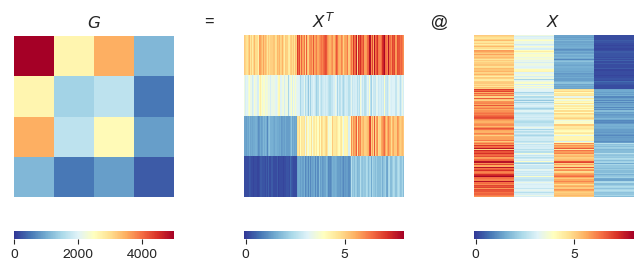

In [60]:
# 第一个格拉姆矩阵
G = X.T @ X
# 第二个格拉姆矩阵
H = X @ X.T
# 可视化第一个格拉姆矩阵运算
fig,axs = plt.subplots(1,5,figsize = (8,3),
                       gridspec_kw={'width_ratios': [3, 0.5, 3, 0.5, 3]})
#使用 gridspec_kw 来指定网格参数。width_ratios 是一个列表，指定了每列子图的宽度比例。第 1、3、5列子图的宽度比例为 3，第 2、4列子图的宽度比例为 0.5。
# 图形状态切换到第1幅子图
plt.sca(axs[0])
# 绘制格拉姆矩阵
ax = sns.heatmap(G, cmap = 'RdYlBu_r',
                 vmax = 5000, vmin = 0,
                 annot = False,
                 fmt=".0f",
                 cbar_kws = {'orientation':'horizontal'},
                 xticklabels = False,
                 yticklabels=False,
                 square = 'equal')
plt.title('$G$')
# 图形状态切换到第2幅子图
plt.sca(axs[1])
plt.title('=')
plt.axis('off')
# 图形状态切换到第3幅子图
plt.sca(axs[2])
# 绘制X转置
ax = sns.heatmap(X.T, cmap = 'RdYlBu_r',
                 vmax = 0, vmin = 8,
                 cbar_kws = {'orientation':'horizontal'},
                 xticklabels = False,
                 yticklabels = False,
                 annot=False)
plt.title('$X^T$')
# 图形状态切换到第4幅子图
plt.sca(axs[3])
plt.title('@')
plt.axis('off') 
# 图形状态切换到第5幅子图
plt.sca(axs[4])
# 绘制X
ax = sns.heatmap(X, cmap = 'RdYlBu_r',
                 vmax = 0, vmin = 8,
                 cbar_kws = {'orientation':'horizontal'},
                 xticklabels = False,
                 yticklabels=False,
                 annot=False)
plt.title('$X$')

In [62]:
# 计算格拉姆矩阵G的逆矩阵
G_inv = np.linalg.inv(G)
G_inv

array([[ 0.05034014, -0.0564344 , -0.04649057,  0.04508845],
       [-0.0564344 ,  0.06736108,  0.04506042, -0.03745986],
       [-0.04649057,  0.04506042,  0.06696879, -0.09831163],
       [ 0.04508845, -0.03745986, -0.09831163,  0.18358105]])

### 5.5 几个常见矩阵分解

In [64]:
# 对格拉姆矩阵G进行Cholesky分解
L = np.linalg.cholesky(G) 
L, L.T

(array([[ 72.27620632,   0.        ,   0.        ,   0.        ],
        [ 36.98907477,   7.88722685,   0.        ,   0.        ],
        [ 48.20064828, -13.76876634,   8.3563496 ,   0.        ],
        [ 15.60873291,  -5.76407773,   4.47500611,   2.33392057]]),
 array([[ 72.27620632,  36.98907477,  48.20064828,  15.60873291],
        [  0.        ,   7.88722685, -13.76876634,  -5.76407773],
        [  0.        ,   0.        ,   8.3563496 ,   4.47500611],
        [  0.        ,   0.        ,   0.        ,   2.33392057]]))

In [66]:
# 对格拉姆矩阵G进行特征值分解
Lambdas, V = np.linalg.eig(G)
Lambdas, V, np.linalg.inv(V)

(array([9.20830507e+03, 3.15454317e+02, 1.19780429e+01, 3.55257020e+00]),
 array([[ 0.75110816,  0.2841749 ,  0.50215472,  0.32081425],
        [ 0.38008617,  0.5467445 , -0.67524332, -0.31725607],
        [ 0.51300886, -0.70866455, -0.05916621, -0.48074507],
        [ 0.16790754, -0.34367081, -0.53701625,  0.75187165]]),
 array([[ 0.75110816,  0.38008617,  0.51300886,  0.16790754],
        [ 0.2841749 ,  0.5467445 , -0.70866455, -0.34367081],
        [ 0.50215472, -0.67524332, -0.05916621, -0.53701625],
        [ 0.32081425, -0.31725607, -0.48074507,  0.75187165]]))

In [67]:
# 鸢尾花数据矩阵X奇异值分解
U,S,VT = np.linalg.svd(X, full_matrices = False)
U, A, VT

(array([[-6.16168450e-02,  1.29611444e-01,  2.13859674e-03,
          1.63819140e-03],
        [-5.80709402e-02,  1.11019776e-01,  7.06723871e-02,
          5.17569646e-02],
        [-5.67630474e-02,  1.17966465e-01,  4.34254909e-03,
          9.55702427e-03],
        [-5.66534426e-02,  1.05308145e-01,  5.92467197e-03,
         -4.16438911e-02],
        [-6.12302023e-02,  1.31089790e-01, -3.18810953e-02,
         -3.22148124e-02],
        [-6.75031684e-02,  1.30884835e-01, -6.85371918e-02,
         -1.13642477e-02],
        [-5.74820774e-02,  1.16598182e-01, -6.64136685e-02,
         -2.67433923e-02],
        [-6.09726328e-02,  1.20943120e-01,  5.43026565e-03,
         -2.40566566e-02],
        [-5.37611959e-02,  9.99414853e-02,  1.76366479e-02,
         -1.65153852e-02],
        [-5.88266594e-02,  1.12043088e-01,  6.49689136e-02,
         -3.04719804e-02],
        [-6.52918230e-02,  1.36578094e-01,  4.93585934e-03,
         -6.46942221e-03],
        [-5.99417779e-02,  1.13753142e-01, 

## 6 NumPy 爱因斯坦求和约定

◄ numpy.average() 计算平均值
◄ numpy.cov() 计算协方差矩阵
◄ numpy.diag() 以一维数组的形式返回方阵的对角线元素,或将一维数组转换成对角阵
◄ numpy.einsum() 爱因斯坦求和约定
◄ numpy.stack() 将矩阵叠加
◄ numpy.sum() 求和

### 6.1 什么是爱因斯坦求和约定？

使用 numpy.einsum() 完成绝大部分有关线性代数运算时，大家记住一个要点——输入中重复的索引代表元素相乘，输出中消去的索引意味着相加。

In [68]:
# C = np.einsum('ij,jk->ik', A, B)
# “->” 之前分别为矩阵 A 和 B 的索引，它们用逗号隔开。矩阵 A 行索引为 i，列索引为 j。矩阵 B 行索引为 j，列索引为 k。j 为重复索引，因此在这个方向上元素相乘。
# “->” 之后为输出结果的索引。输出结果索引为 ik，消去 j，因此在 j 索引方向上存在相乘再求和的运算。

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (2,2)->(2,newaxis,2) (3,3)->(3,3) 

### 6.2 二维数组求和

In [69]:
# 从sklearn导入鸢尾花数据
iris = load_iris()
X = iris.data
y = iris.target
# 每一列求和
np.einsum('ij->j',X)
# np.sum(X, axis = 0)
# 每一行求和
np.einsum('ij->i',X)
# np.sum(X, axis = 1)
# 矩阵所有元素求和
np.einsum('ij->',X)
# np.sum(X, axis = (0,1))

2078.6999999999994

### 6.3 转置

In [70]:
# 二维数组转置
np.einsum('ij->ji',X)
# X.T
# np.transpose(X)
# 三维数组
X3D = np.stack([X[y == 0],
 X[y == 1],
 X[y == 2]], axis=0)
# 三维数组转置
X3D_T = np.einsum('ijk->ikj', X3D)
# np.transpose(X3D,(0, 2, 1))

### 6.4 矩阵乘法

In [71]:
# 计算矩阵乘法 X @ X.T
np.einsum('ij,kj->ik', X, X)
# np.einsum('ij,jk->ik', X, X.T)
# X @ X.T
# 计算矩阵乘法 X.T @ X
G = np.einsum('ij,ik->jk', X, X)
# np.einsum('ij,jk->ik', X.T, X)
# X.T @ X
# 三维矩阵乘法
G_3D = np.einsum('ijk,ijm->ikm', X3D, X3D)
# np.einsum('mij,mjk->mik', X3D_T, X3D)

### 6.5 一维数组

In [73]:
# 提取两个行向量
a_1D = X[0]
b_1D = X[1]
# 一维向量求和
np.einsum('i->',a_1D)
# 一维向量逐项积
np.einsum('i,i->i',a_1D,b_1D)
# 一维向量内积
np.einsum('i,i->',a_1D,b_1D)
# 一维向量外积
np.einsum('i,j->ij',a_1D,b_1D)

array([[24.99, 15.3 ,  7.14,  1.02],
       [17.15, 10.5 ,  4.9 ,  0.7 ],
       [ 6.86,  4.2 ,  1.96,  0.28],
       [ 0.98,  0.6 ,  0.28,  0.04]])

### 6.6 方阵

In [74]:
np.einsum('ii->i', G)
# np.diag(G)
np.einsum('ii->', G)
# np.trace(G)

9539.289999999997

### 6.7 统计运算

In [75]:
# 计算列均值，质心
n = X.shape[0] # 样本数量
mean_X = np.einsum('ij->j', X) / n
# np.mean(X, axis = 0)
# 计算方差
X_c = X - mean_X # 中心化数据
variance = np.einsum('ij,ij->j', X_c, X_c) / (n - 1)
# np.var(X, axis = 0, ddof = 1)
# 计算协方差矩阵
cov_matrix = np.einsum('ij,ik->jk', X_c, X_c) / (n - 1)
# np.cov(X.T, ddof = 1)